# Python setup

In [1]:
import os

# Changes the notebook working directory on level up.
%cd ..

# Running main python script.
%run -i "src/main.py"

# Data set from main.py
data_set

c:\Oystein\UIS\Introduksjon datavitenskap\dat540-netflix_catalogue


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Unknown director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,Unknown director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,Unknown director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
...,...,...,...,...,...,...,...,...,...,...,...,...
6229,80000063,TV Show,Red vs. Blue,Unknown director,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,Unknown date_added,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6230,70286564,TV Show,Maron,Unknown director,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,Unknown date_added,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
6231,80116008,Movie,Little Baby Bum: Nursery Rhyme Friends,Unknown director,Unknown cast,Unknown country,Unknown date_added,2016,Unknown rating,60 min,Movies,Nursery rhymes and original music for children...
6232,70281022,TV Show,A Young Doctor's Notebook and Other Stories,Unknown director,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,Unknown date_added,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."


Find how many series and movies have been added each year.
- First find when series and movies were released to see the how many new and old productions they have in the catalouge
- See when series and movies were added to netflix catlouge and the development of movies vs series
- Check when netflix started to release older content to their catalouge


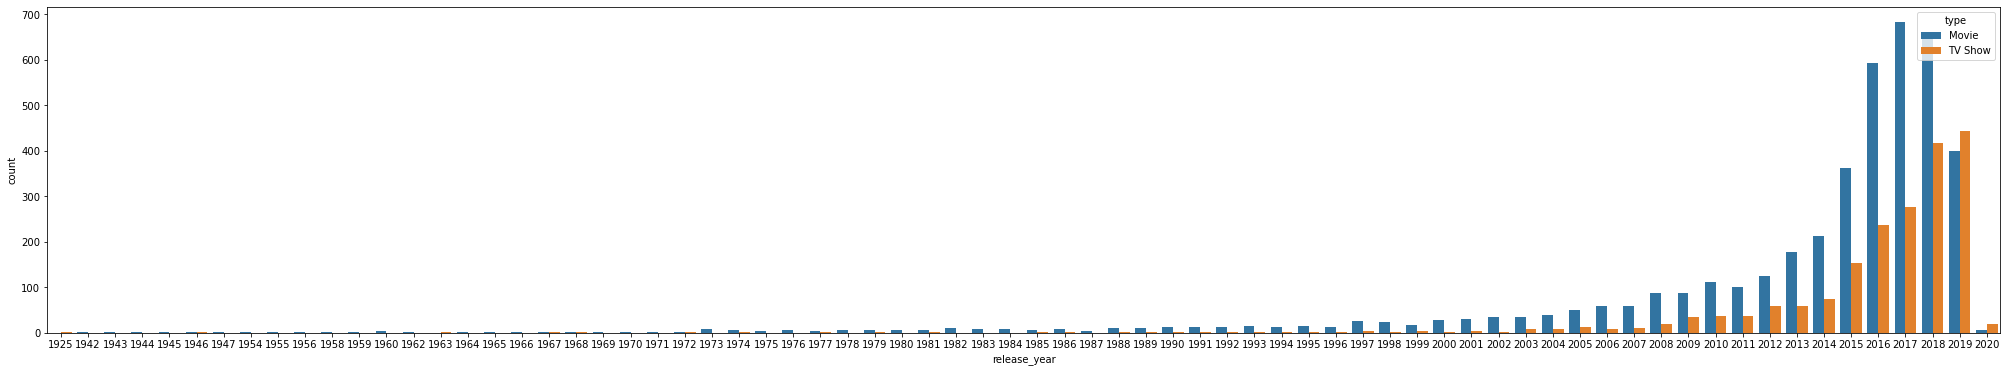

In [2]:
# Import the library used for plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (35,6))
sns.countplot(x='release_year', data = data_set, hue='type') # Plot the release year

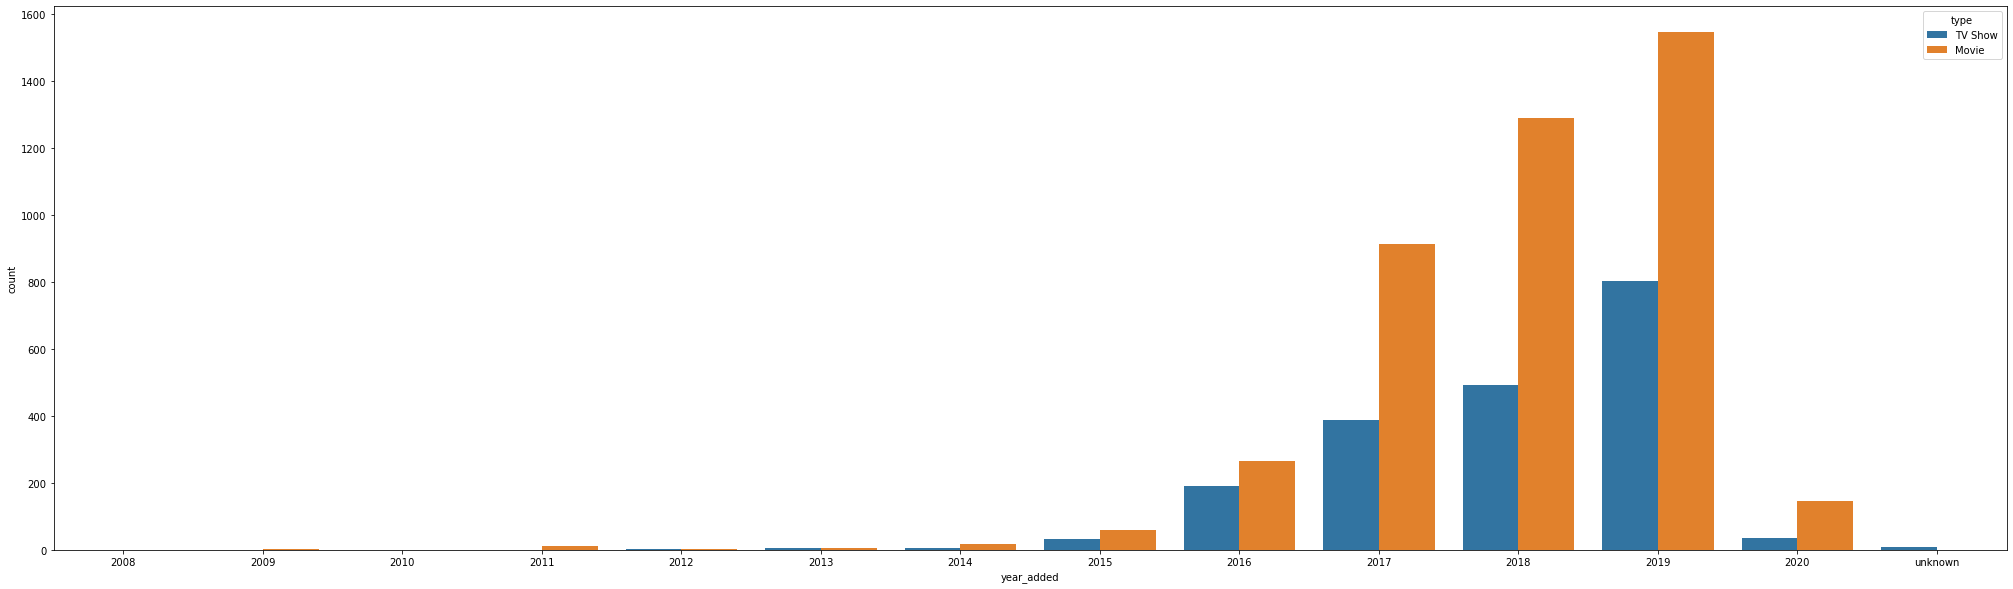

In [3]:
# See when series and movies where added to netflix catalouge
df = data_set.copy()
df['year_added'] = df['date_added'].str[-4:]
df['year_added'].replace({"dded": "unknown"}, inplace = True)
df.sort_values(by=['year_added'], inplace=True)

plt.figure(figsize = (35,10))
sns.countplot(x=df['year_added'], data = df, hue='type')


In [4]:
# Check when they added new and old content to the library

data_set['release_year'].value_counts()

2018    1063
2017     959
2019     843
2016     830
2015     517
        ... 
1959       1
1963       1
1964       1
1956       1
1925       1
Name: release_year, Length: 72, dtype: int64

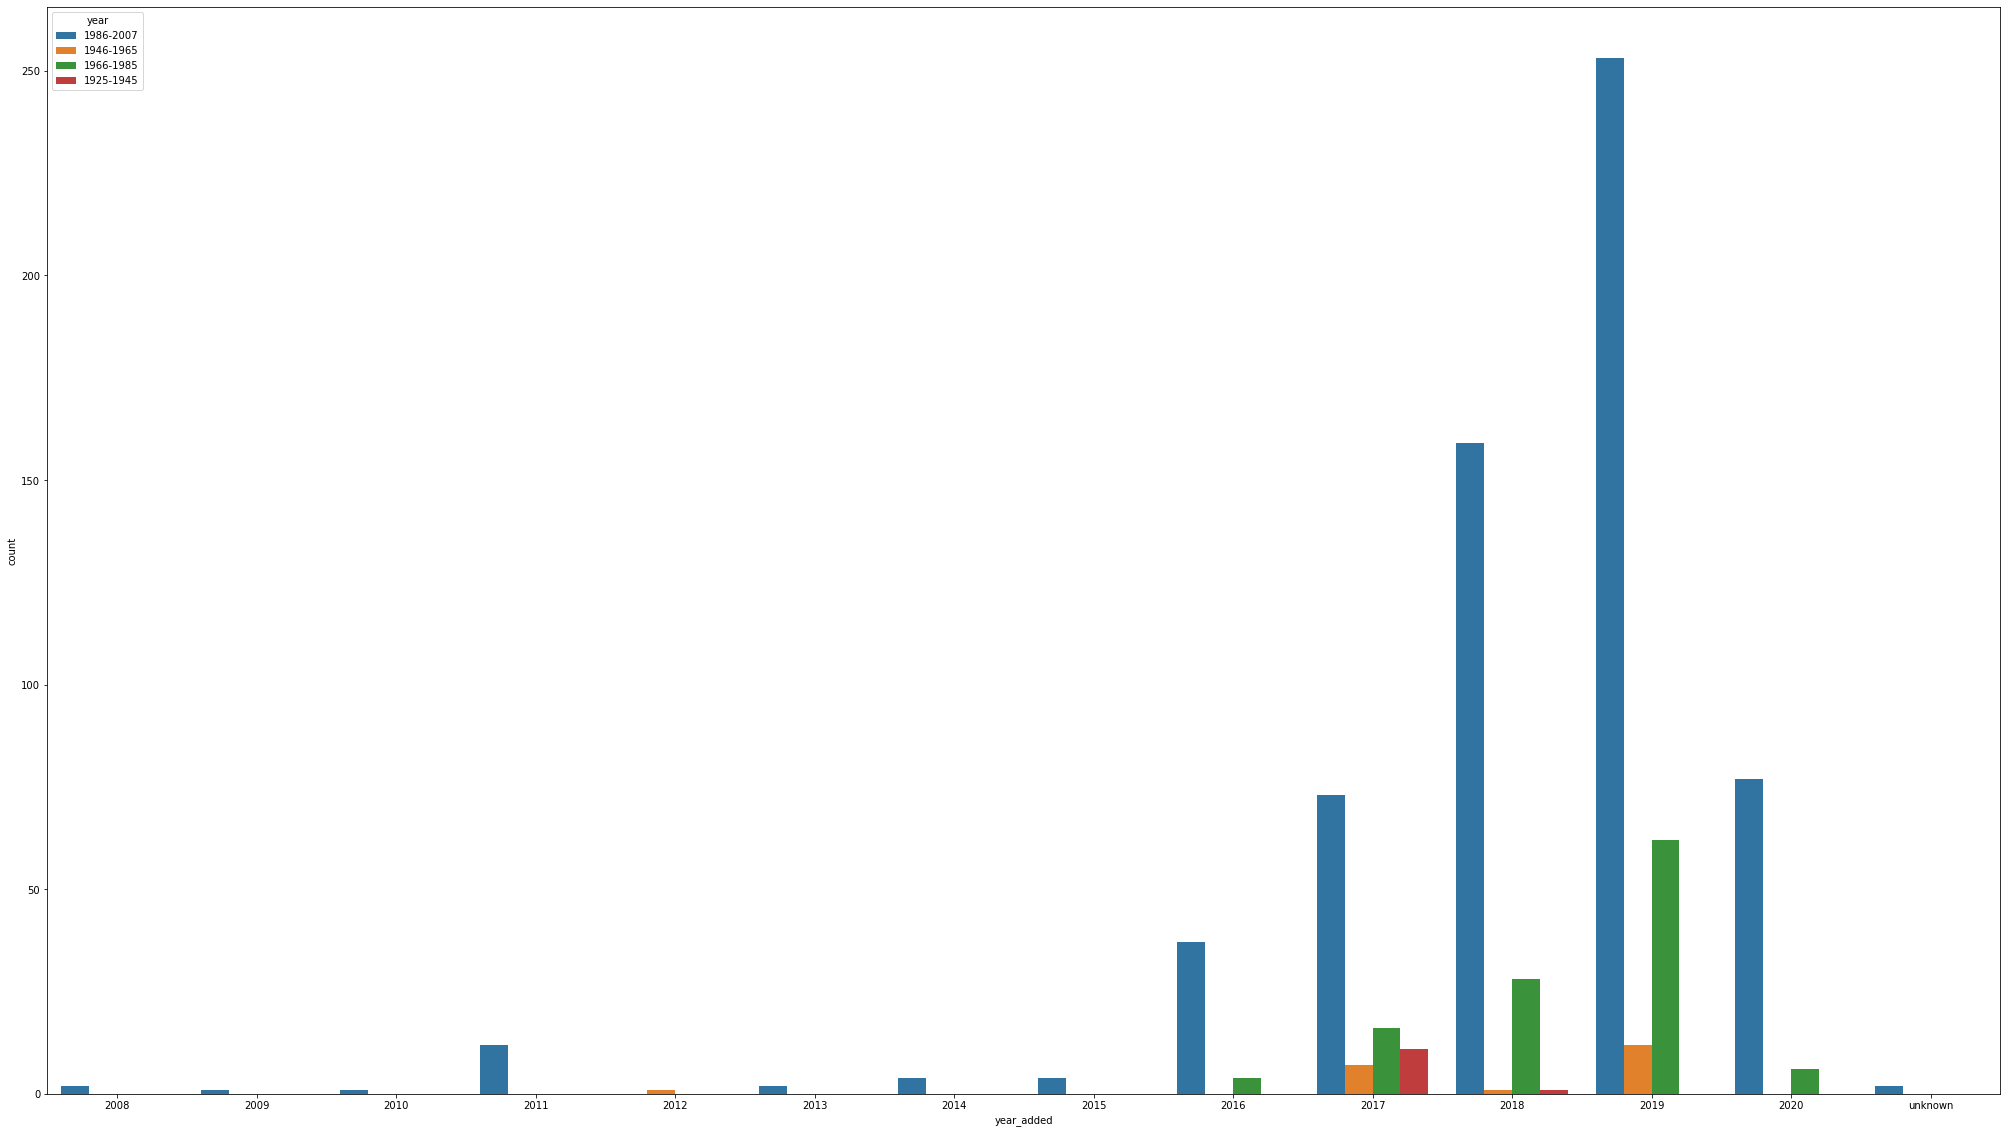

In [6]:
import numpy as np

# Ceck when netflix started to add older content to the catalouge

df['decade'] = ""   # Make new column in the dataset

# Make conditions for the plot
conditions = [
    (df['release_year'] >= 1925) & (df['release_year'] <= 1945),
    (df['release_year'] >= 1946) & (df['release_year'] <= 1965),
    (df['release_year'] >= 1966) & (df['release_year'] <= 1985),
    (df['release_year'] >= 1986) & (df['release_year'] <= 2007),
    (df['release_year'] >= 2008) & (df['release_year'] <= 2020)
]

values = ['1925-1945', '1946-1965', '1966-1985', '1986-2007', '2008-2020'] # Which value to add to the condition interval

df['year'] = np.select(conditions, values)   # Add values to decade

df.drop(df.loc[df['year']=='2008-2020'].index, inplace=True)  # Drop content made after netflixc was released


plt.figure(figsize = (35,20))
sns.countplot(x=df['year_added'], data = df, hue='year')

